In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from utils import PlaceFields, get_coords, get_flanks, to_tensor, gaussian_grid
from scipy.stats import multivariate_normal
from torch.optim import RMSprop
from torch.optim.lr_scheduler import ExponentialLR
from tqdm import tqdm

In [2]:
res = 400
coords = get_coords(res)
flanks = get_flanks(res + res // 10)

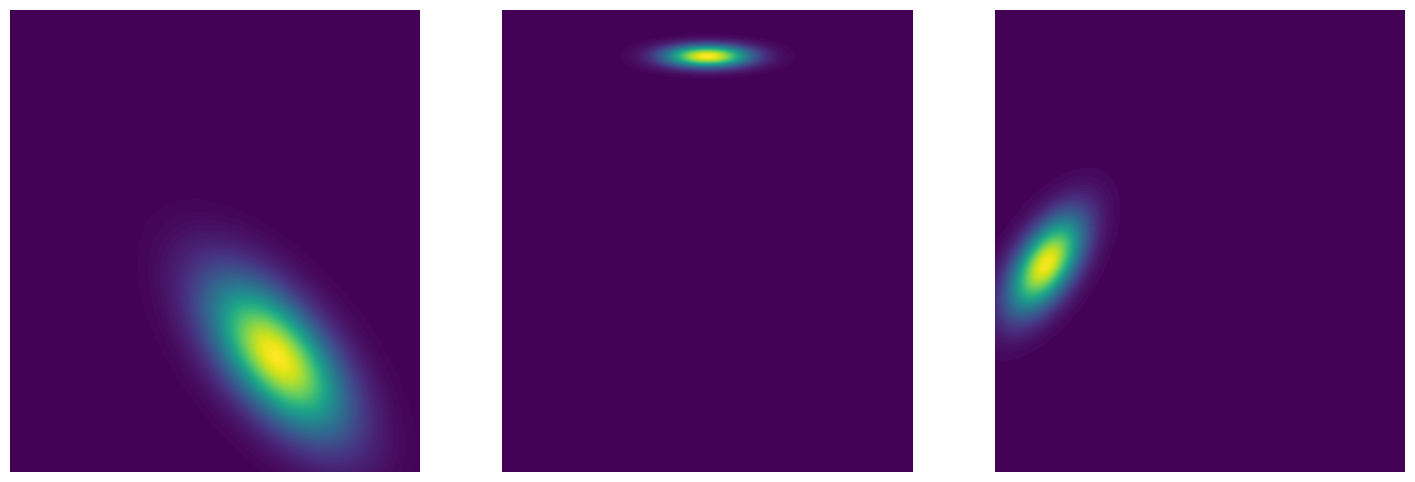

In [3]:
means = np.asarray([
    [0.3, -0.5],
    [0., 0.8],
    [-0.75, -0.1]
])
covs = np.asarray([
    [[0.05, -0.03],
     [-0.03, 0.05]],
    [[0.02, 0.],
     [0., 0.001]],
    [[0.015, 0.01],
     [0.01, 0.02]]
])


targets = [gaussian_grid(coords.cpu(), [multivariate_normal(mean=m, cov=cov)]) for m, cov in zip(means, covs)]

for ax, target in zip(plt.subplots(1, 3, figsize=(18, 6))[1], targets):
    ax.contourf(target, levels=100)
    ax.axis('off')
plt.show()

In [4]:
targets = to_tensor(np.asarray(targets))
pfs = PlaceFields(coords, flanks, targets)
pfs.informed_init()
losses = pfs.fit()

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:28<00:00, 104.76it/s]


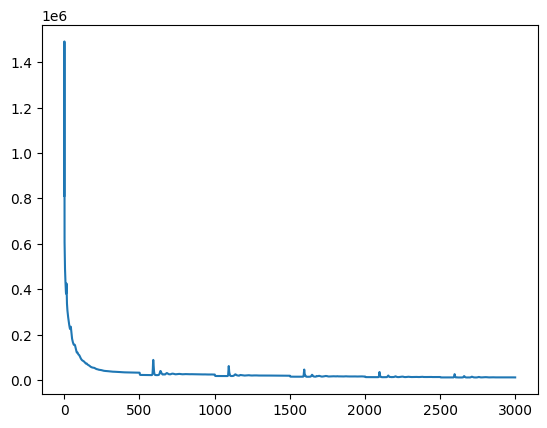

In [5]:
plt.plot(losses)

In [6]:
print("Prediction:")
print(pfs.means.data.cpu().numpy())
print("\nActual:")
print(means)

Prediction:
[[ 0.29363886 -0.49361116]
 [-0.00114245  0.801558  ]
 [-0.74823624 -0.0967644 ]]

Actual:
[[ 0.3  -0.5 ]
 [ 0.    0.8 ]
 [-0.75 -0.1 ]]


In [7]:
print("Prediction:")
print(torch.inverse(pfs.get_cov_inv()).detach().cpu().numpy())
print("\nActual:")
print(covs)

Prediction:
[[[ 4.6308357e-02 -2.4826856e-02]
  [-2.4826856e-02  4.2334761e-02]]

 [[ 2.0044502e-02 -1.8617138e-06]
  [-1.8617137e-06  1.0046246e-03]]

 [[ 1.2556980e-02  4.1451994e-03]
  [ 4.1451994e-03  1.8352114e-02]]]

Actual:
[[[ 0.05  -0.03 ]
  [-0.03   0.05 ]]

 [[ 0.02   0.   ]
  [ 0.     0.001]]

 [[ 0.015  0.01 ]
  [ 0.01   0.02 ]]]


In [8]:
print(pfs.scales.data.cpu().numpy())

[[2.0320444]
 [5.9639406]
 [3.2914574]]


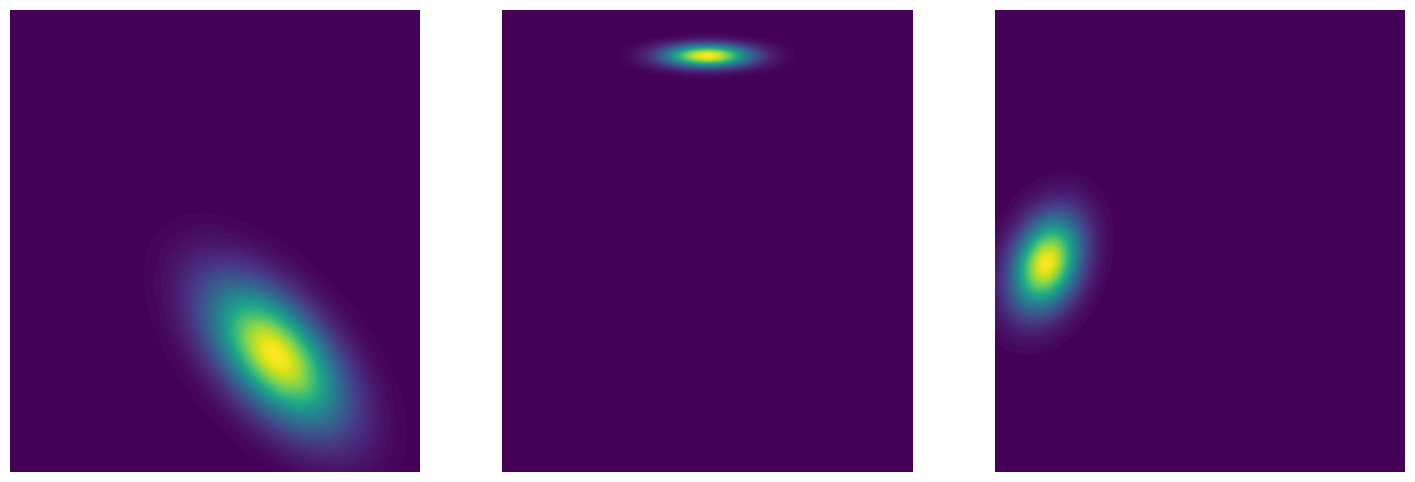

In [9]:
for ax, pred in zip(plt.subplots(1, 3, figsize=(18, 6))[1], pfs.predict().cpu().detach()):
    ax.contourf(pred, levels=100)
    ax.axis('off')
plt.show()